In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

In [4]:
file = pd.read_csv('survey lung cancer.csv')
file.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
list_of_features = ['GENDER','AGE','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE',
                    'FATIGUE ','ALLERGY ','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']
p = file[list_of_features]
q = file['LUNG_CANCER']



In [6]:
p['SEX'] = p['GENDER'].map({'M':1, 'F':0})
p_updated = p.drop(columns = 'GENDER')
p_updated.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,SEX
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


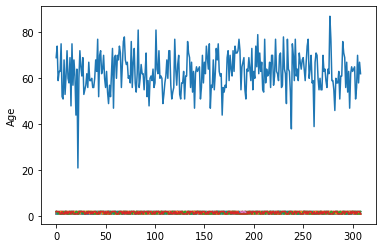

In [7]:
age = file.plot()
plt.ylabel('Age')
age.get_legend().remove()

<AxesSubplot:xlabel='AGE', ylabel='ANXIETY'>

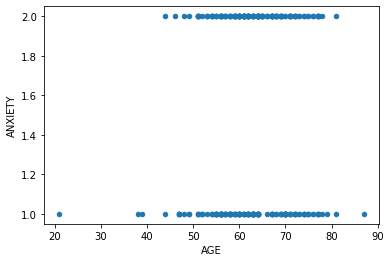

In [8]:
file.plot.scatter(x="AGE", y="ANXIETY")

The problem that we have chosen (Lung Cancer prediction) comes under "Regression Modelling" but not "Classification" as we are only trying to idenitfy if a person has lung cancer or not. We are neither classifyinhg nor dividing the data that we have, rather we are focusing on either if a person has cancer (YES) or not (NO).

The models that we have considered for our data are:
1.Linear Regression
2.Ridge Regression
3.XGBOOST Regression

In [9]:
LE = LabelEncoder()
LE = LE.fit(q)
encoded_q = LE.transform(q)
q_final = pd.DataFrame(encoded_q)
q_final.head()

,0
0,1
1,1
2,0
3,0
4,0


In [10]:
P_train, P_valid, q_train, q_valid = train_test_split(p_updated, q_final)

In [11]:
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
model_LR= LinearRegression()
lr.fit(P_train, q_train)
lr_pred= lr.predict(P_valid)

In [15]:
predictions = lr.predict(P_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, q_valid)))

Mean Absolute Error: 0.1758010793027988


In [16]:
model = Ridge(alpha = 0.01, normalize = True)
model.fit(P_train, q_train)             
pred_ridge = model.predict(P_valid)

predictions = model.predict(P_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, q_valid)))

Mean Absolute Error: 0.1814710974157904


In [13]:
P_train, P_valid, q_train, q_valid = train_test_split(p_updated, q_final)
model = XGBRegressor()
model.fit(P_train, q_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(P_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, q_valid)))


Mean Absolute Error: 0.14321041898578046


From the results that we have obtained from testing all the three models, we can see that XGBOOST Regression gives the least Mean Absolute Error (shows the difference between meausred and predicted values). So we have decided to choose XGBOOST for the further steps that we'll be taking.

Hence, implementing the selected model to predict if a person has lung cancer or not,

In [19]:
P_train, P_valid, q_train, q_valid = train_test_split(p_updated, q_final)
model = XGBRegressor()
model.fit(P_train, q_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [20]:
predictions = model.predict(P_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, q_valid)))

Mean Absolute Error: 0.16341097738880378


We have completed the implementation process. 